In [1]:
import torch
import math
from glob import glob
import random


In [2]:
files = glob( '/home/loganaw/sonic_link/590/sliced_out/MET/*' )
random.shuffle( files )
print( len( files ) ) 

157000


In [3]:
from PIL import Image
import PIL.ImageOps
import numpy as np

train_scores = []

TILE_SIZE = 128

for i,fname in enumerate( files ):
    f = Image.open(fname)
    fi = PIL.ImageOps.invert(f)
    fa = np.array( fi, dtype=np.float )
    
    train_scores.append(
        (
            fname,
            np.mean( fa[:TILE_SIZE,:TILE_SIZE,:2] ),
            np.max( fa[:TILE_SIZE,:TILE_SIZE,:2] ),
        )
    )
    
    f.close()
    fi.close()

In [4]:
import seaborn as sns

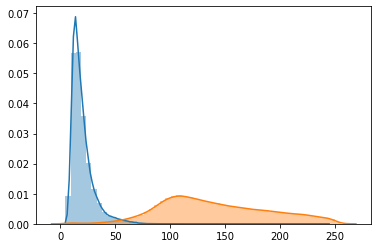

In [5]:
sns.distplot(
        [x[1] for x in train_scores]
)
sns.distplot(
    [x[2] for x in train_scores]
)

In [8]:
len( [ x[1] for x in train_scores if x[1] > 40 ] )

7873

In [20]:
sample = [ x for x in train_scores if x[1] > 40 ]
sample += [ x for x in train_scores if x[1] <= 40 ][:len(sample)*2]

In [21]:
len( sample )

23619

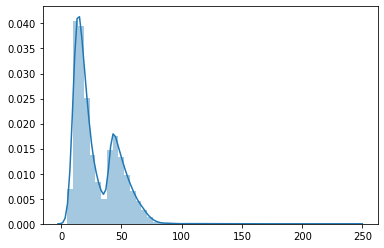

In [22]:
sns.distplot( [ x[1] for x in sample ] )

In [24]:
f = open( 'weighted_sample.txt', 'w' )

for line in sample:
    f.write( line[0] )
    f.write( '\n' )
    
f.close()